# Proyek Analisis Data: Nama dataset
- Nama: Muhammad Ridho Hamdallah
- Email: ridhohamdallah9@gmail.com
- Id Dicoding: Hamdallah

## Menentukan Pertanyaan Bisnis

- pertanyaan 1
Berapa persentase peningkatan jumlah penyewa terdaftar daripada penyewa kasual dalam jangka waktu 1 tahun?

- pertanyaan 2
Berapa rata-rata jumlah sewa sepeda pada hari hujan dibandingkan dengan hari cerah, dalam jangka waktu 1 bulan?

## Menyaipkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [3]:
days_df = pd.read_csv("/content/Bike/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hours_df = pd.read_csv("/content/Bike/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
days_df.info()
days_df.isna().sum()
days_df.duplicated().sum()
days_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
hours_df.info()
hours_df.isna().sum()
hours_df.duplicated().sum()
hours_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Dari data diatas

1. pada kedua data,
tipe data pada kolom 'dteday' yang bertipe object, seharusnya kolom ini berisi informasi tentang suatu tanggal berarti bertipe waktu atau datetime



In [7]:
dteday_columns = ["dteday"]

for column in dteday_columns:
  days_df[column] = pd.to_datetime(days_df[column])
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
dteday_columns = ["dteday"]

for column in dteday_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
# Ambil data dalam satu tahun
start_date = "2011-01-01"
end_date = "2011-12-31"
df_filtered = days_df.loc[days_df["dteday"].between(start_date, end_date)]

# Ambil data casual dan register
df_filtered = days_df[["dteday","casual","registered",]]
print(df_filtered)

        dteday  casual  registered
0   2011-01-01     331         654
1   2011-01-02     131         670
2   2011-01-03     120        1229
3   2011-01-04     108        1454
4   2011-01-05      82        1518
..         ...     ...         ...
726 2012-12-27     247        1867
727 2012-12-28     644        2451
728 2012-12-29     159        1182
729 2012-12-30     364        1432
730 2012-12-31     439        2290

[731 rows x 3 columns]


In [10]:
#Mengambil data acak pada satu bulan
last_month = days_df.loc[(days_df["dteday"] >= "2012-12-01") & (days_df["dteday"] <= "2012-12-31")]
last_month = last_month[["dteday","weathersit", "cnt"]]
#ambil data count dan data cuaca
print(last_month)

        dteday  weathersit   cnt
700 2012-12-01           2  5191
701 2012-12-02           2  4649
702 2012-12-03           1  6234
703 2012-12-04           1  6606
704 2012-12-05           1  5729
705 2012-12-06           1  5375
706 2012-12-07           2  5008
707 2012-12-08           2  5582
708 2012-12-09           2  3228
709 2012-12-10           2  5170
710 2012-12-11           2  5501
711 2012-12-12           2  5319
712 2012-12-13           1  5532
713 2012-12-14           1  5611
714 2012-12-15           1  5047
715 2012-12-16           2  3786
716 2012-12-17           2  4585
717 2012-12-18           1  5557
718 2012-12-19           1  5267
719 2012-12-20           2  4128
720 2012-12-21           2  3623
721 2012-12-22           1  1749
722 2012-12-23           1  1787
723 2012-12-24           2   920
724 2012-12-25           2  1013
725 2012-12-26           3   441
726 2012-12-27           2  2114
727 2012-12-28           2  3095
728 2012-12-29           2  1341
729 2012-1

## Visualization & Explanatory Analysis

### Pertanyaan 1:

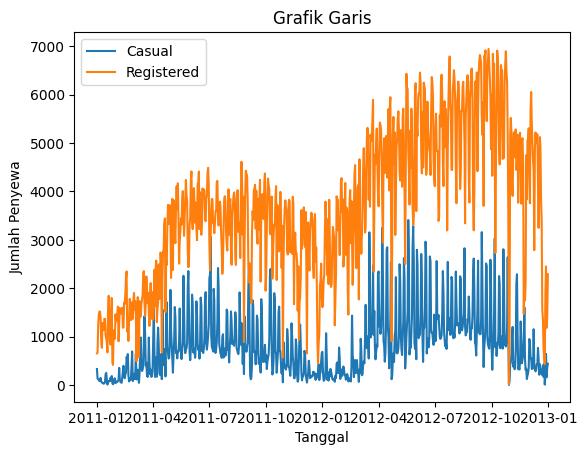

In [11]:
# Plot nilai casual dan nilai registered
plt.plot(days_df["dteday"], days_df["casual"], label="Casual")
plt.plot(days_df["dteday"], days_df["registered"], label="Registered")

#judul dan label sumbu
plt.title("Grafik Garis")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewa")

# Tambah legenda Tampilkan grafik
plt.legend()
plt.show()

### Pertanyaan 2:

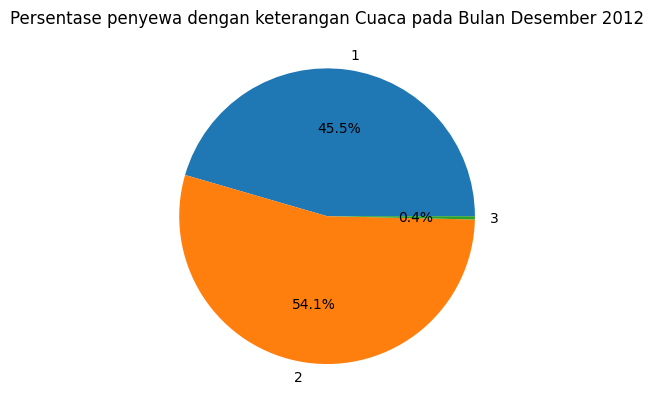

In [17]:
last_month["weather"] = last_month["weathersit"].replace({1: 1, 2: 2, 3: 3, 4: 4})
last_month_group = last_month.groupby("weather").agg({"cnt": "sum"})

# Visualisasi data dengan diagram lingkaran
plt.pie(last_month_group["cnt"], labels=last_month_group.index, autopct="%.1f%%")
plt.title("Persentase penyewa dengan keterangan Cuaca pada Bulan Desember 2012")
plt.show()

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2

Berdasarkan kedua soal tersebut, dapat disimpulkan bahwa jumlah penyewa sepeda yang terdaftar meningkat secara signifikan dalam jangka waktu 1 tahun. Hal ini menunjukkan bahwa program penyewaan sepeda ini semakin populer dan diterima oleh masyarakat.

Selain itu, rata-rata jumlah sewa sepeda pada hari cerah lebih tinggi daripada rata-rata jumlah sewa sepeda pada hari hujan. Hal ini menunjukkan bahwa cuaca cerah lebih disukai oleh para penyewa sepeda.

In [18]:
all_data = pd.concat([days_df, hours_df])

all_data.to_csv("all_data.csv", index=False)